In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
%pprint

Pretty printing has been turned OFF


In [3]:
fold = "../../esther dissertation"

In [4]:
os.listdir(fold)

['DissertationProposal_methods_v3.docx', 'rudolphhammen.pdf', 'StressShell (1).csv', 'Stress_Episodic_Coding.doc']

In [5]:
stress = pd.read_csv(fold+"/StressShell (1).csv")

In [6]:
stress.head()

,Participant,C_Acad_Sev,C_Beh_Sev,C_Peer_Sev,C_PC_Sev,C_Mar_Sev,C_House_Sev,C_Rom_Sev,C_HealSelf_Sev,C_HealOth_Sev,...,C_lifetime_E4,C_E4_lifetimeAge_6,C_E4_LTcateg_6,C_E4_LTcontent_6,C_E4_LT_Conflict_6,C_E4_LTIsubjmpact_6,C_E4_LTIndependence_6,C_E4_LTobjective_rating_of_impact,C_E4_LTrejection,C_E4_age
0,1,2.5,1.0,3.0,3.5,4.0,2.0,2.0,2.0,2.0,...,,,,,,,,,,
1,2,3.5,1.0,3.0,4.0,3.5,3.0,2.0,3.5,1.0,...,,,,,,,,,,
2,3,2.0,1.0,2.0,3.0,2.5,2.5,1.5,1.0,2.0,...,,,,,,,,,,
3,4,1.5,1.0,3.5,3.5,4.0,1.0,1.0,1.0,2.0,...,,,,,,,,,,
4,5,1.5,1.0,2.5,2.0,1.5,1.0,1.0,1.0,2.5,...,,,,,,,,,,


In [7]:
# first we need to fix the inconsistent column names

In [8]:
fixed_cols = []
for x in stress.columns:
    t = ""+x
    if t.lower().endswith("subimpac"):
        t+="t"
    if t.endswith("_6"):
        t = t.replace("_6","")
    if t.endswith("_T1"):
        t = t.replace("_T1","")
    t = '_'.join([x.title() for x in t.split("_")])
    fixed_cols.append(t)

In [9]:
stress.columns = fixed_cols

In [10]:
stress.head()

,Participant,C_Acad_Sev,C_Beh_Sev,C_Peer_Sev,C_Pc_Sev,C_Mar_Sev,C_House_Sev,C_Rom_Sev,C_Healself_Sev,C_Healoth_Sev,...,C_Lifetime_E4,C_E4_Lifetimeage,C_E4_Ltcateg,C_E4_Ltcontent,C_E4_Lt_Conflict,C_E4_Ltisubjmpact,C_E4_Ltindependence,C_E4_Ltobjective_Rating_Of_Impact,C_E4_Ltrejection,C_E4_Age
0,1,2.5,1.0,3.0,3.5,4.0,2.0,2.0,2.0,2.0,...,,,,,,,,,,
1,2,3.5,1.0,3.0,4.0,3.5,3.0,2.0,3.5,1.0,...,,,,,,,,,,
2,3,2.0,1.0,2.0,3.0,2.5,2.5,1.5,1.0,2.0,...,,,,,,,,,,
3,4,1.5,1.0,3.5,3.5,4.0,1.0,1.0,1.0,2.0,...,,,,,,,,,,
4,5,1.5,1.0,2.5,2.0,1.5,1.0,1.0,1.0,2.5,...,,,,,,,,,,


In [11]:
[x for x in stress.columns if "Sev" in x]

['C_Acad_Sev', 'C_Beh_Sev', 'C_Peer_Sev', 'C_Pc_Sev', 'C_Mar_Sev', 'C_House_Sev', 'C_Rom_Sev', 'C_Healself_Sev', 'C_Healoth_Sev', 'C_Fin_Sev', 'C_Legal_Sev', 'C_Viol_Sev', 'C_Disc_Sev']

In [12]:
# each E = an independent episode, flatten by episode

In [13]:
col_names = ["Start","Subimpact","Category","Content","Conflict","Impact","Independence","Rejection"]

In [14]:
col_name_lists = []
for x in range(2,19):
    temp = ["Participant"]
    for name in col_names:
        temp.append("C_E"+str(x)+"_"+name)
    col_name_lists.append(temp)

In [15]:
# check that i caught them all
for l in col_name_lists:
    for x in l:
        if x not in stress.columns:
            print(x)

In [16]:
stress_df_cleaned = pd.DataFrame()

In [17]:
for l in col_name_lists:
    event = [x for x in l[-1].split("_") if "E" in x][0]
    for row in stress.loc[:,l].Participant:
        vals = stress.loc[:,l].loc[lambda df: df['Participant'] == row]
        vals.insert(1, "Event", event)
        vals.columns = ["Participant","Event"]+col_names
        stress_df_cleaned = pd.concat([stress_df_cleaned, vals])

In [18]:
stress_df_cleaned.head()

,Participant,Event,Start,Subimpact,Category,Content,Conflict,Impact,Independence,Rejection
0,1,E2,,2,3,5,0,2.0,5,0
1,2,E2,12,5,2,6,0,3.0,1,1
2,3,E2,7,2,5,15,0,2.0,5,0
3,4,E2,52,2,3,5,3,2.5,4,0
4,5,E2,16,2,5,6,0,3.0,1,0


In [19]:
stress_df_cleaned.describe()

,Participant
count,816.000000
mean,24.500000
std,13.861896
min,1.000000
25%,12.750000
50%,24.500000
75%,36.250000
max,48.000000


In [20]:
stress_df_cleaned = stress_df_cleaned.replace(r'^\s*$', np.nan, regex=True)

In [21]:
len(stress_df_cleaned)

816

In [22]:
len(stress_df_cleaned.dropna(subset=["Impact"]))

310

In [23]:
category = {
    1:"Bereavement",
    2:"Separation",
    3:"Interpersonal problem - peer",
    4:"Interpersonal problem - family",
    5:"Change, move, adjustment",
    6:"Illness, injury, accident - self",
    7:"Illness, injury, accident - other",
    8:"Failure and disappointment",
    9:"Material loss",
    10:"Child abuse",
    11:"Start dating",
    12:"Stops dating, breakup",
    13:"Resumes dating",
    14:"Interpersonal problem - other",
    15:"Trouble with police",
    16:"Victim of crime",
    17:"Starts work",
    18:"Quits work",
    19:"Victim of natural disaster",
    20:"Other event",
    21:"Cross-gender platonic",
    22:"Cross-gender romantic",
    23:"Legal",
    24:"Exposure to violence"
}

In [24]:
content_specific = {
    1:"Parent-child dependent",
    2:"Parent-child independent",
    3:"Family dependent",
    4:"Family independent",
    5:"Peer dependent",
    6:"Peer independent",
    7:"School academic dependent",
    8:"School academic independent",
    9:"School behavior dependent",
    10:"School behavior independent",
    11:"Other interpersonal dependent",
    12:"Other interpersonal independent",
    13:"Other non-interpersonal dependent",
    14:"Other non-interpersonal independent",
    15:"School transition dependent",
    16:"Romantic interpersonal",
    17:"Also romantic interpersonal"
}

In [25]:
content_general = {x:content_specific[x].split()[-1] for x in content_specific.keys()}

In [26]:
content_general

{1: 'dependent', 2: 'independent', 3: 'dependent', 4: 'independent', 5: 'dependent', 6: 'independent', 7: 'dependent', 8: 'independent', 9: 'dependent', 10: 'independent', 11: 'dependent', 12: 'independent', 13: 'dependent', 14: 'independent', 15: 'dependent', 16: 'interpersonal', 17: 'interpersonal'}

In [27]:
conflict = {
    0:"no conflict",
    1:"parent-child",
    2:"family",
    3:"peer",
    4:"other",
    5:"cross-gender",
    6:"family with other person"
}

In [28]:
stress_df_decoded = stress_df_cleaned.copy()
stress_df_decoded = stress_df_decoded.dropna(subset=["Impact"])
stress_df_decoded["Conflict"]=stress_df_decoded.Conflict.map(conflict)
stress_df_decoded["Category"]=stress_df_decoded.Category.map(category)
stress_df_decoded["Content_specific"]=stress_df_decoded.Content.map(content_specific)
stress_df_decoded["Content"]=stress_df_decoded.Content.map(content_general)
stress_df_decoded["Impact"]=stress_df_decoded.Impact.map(np.float64)

In [29]:
# 1 = most independent
# 5 = most dependent
# make binary - scores >=3 dependent scores <3 independent
binary_independent = {
    1:"independent",
    2:"independent",
    3:"dependent",
    4:"dependent",
    5:"dependent"
}

In [30]:
stress_df_decoded["Independence_binary"]=stress_df_decoded.Independence.map(binary_independent)

In [31]:
stress_df_decoded.head()

,Participant,Event,Start,Subimpact,Category,Content,Conflict,Impact,Independence,Rejection,Content_specific,Independence_binary
0,1,E2,NaN,2,Interpersonal problem - peer,dependent,no conflict,2.0,5,0,Peer dependent,dependent
1,2,E2,12,5,Separation,independent,no conflict,3.0,1,1,Peer independent,independent
2,3,E2,7,2,"Change, move, adjustment",dependent,no conflict,2.0,5,0,School transition dependent,dependent
3,4,E2,52,2,Interpersonal problem - peer,dependent,peer,2.5,4,0,Peer dependent,dependent
4,5,E2,16,2,"Change, move, adjustment",independent,no conflict,3.0,1,0,Peer independent,independent


In [32]:
stress_df_decoded.describe()

,Participant,Impact
count,310.000000,310.000000
mean,22.087097,2.259677
std,12.887194,0.787947
min,1.000000,1.000000
25%,12.000000,2.000000
50%,19.000000,2.000000
75%,34.000000,3.000000
max,48.000000,5.000000


In [33]:
stress_df_decoded.Content.value_counts()

dependent        21
independent      21
interpersonal     6
Name: Content, dtype: int64

In [34]:
stress_df_decoded.Independence_binary.value_counts()

independent    25
dependent      23
Name: Independence_binary, dtype: int64

In [46]:
stress_df_decoded.groupby("Content_specific").Impact.value_counts()

Content_specific                     Impact
Also romantic interpersonal          2.0       1
Family independent                   1.5       1
                                     2.5       1
                                     3.0       1
                                     4.5       1
Other interpersonal dependent        2.0       2
                                     2.5       1
                                     3.0       1
Other non-interpersonal dependent    1.0       1
Other non-interpersonal independent  1.0       1
                                     3.0       1
Peer dependent                       2.5       4
                                     2.0       2
                                     1.0       1
                                     3.0       1
Peer independent                     2.0       7
                                     3.0       5
                                     1.0       1
                                     1.5       1
                         

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Independence_binary', ylabel='Impact'>

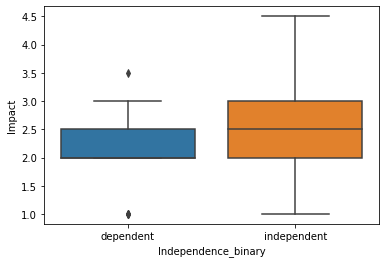

In [37]:
sns.boxplot(data=stress_df_decoded,x="Independence_binary",y="Impact")

<AxesSubplot:xlabel='Conflict', ylabel='Impact'>

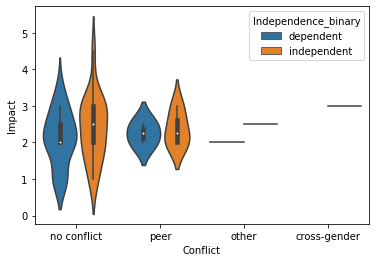

In [38]:
sns.violinplot(data=stress_df_decoded,x="Conflict",y="Impact",hue="Independence_binary")

In [44]:
stress_df_decoded.groupby("Conflict").Independence_binary.value_counts()

Conflict      Independence_binary
cross-gender  independent             1
no conflict   dependent              19
              independent            19
other         dependent               2
              independent             1
peer          independent             4
              dependent               2
Name: Independence_binary, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Impact'>

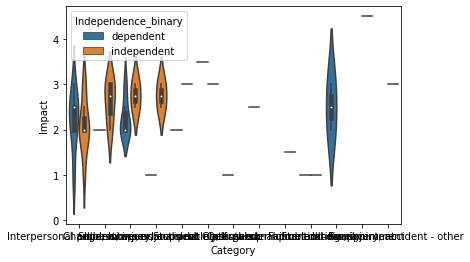

In [39]:
sns.violinplot(data=stress_df_decoded,x="Category",y="Impact",hue="Independence_binary")